# Relationship between demand and profit

One of the core marketing functions is setting the right price. Prices are set with respect to some objective, typically this objective for businesses is profit maximization. We will explore a few simple pricing examples in this notebook.

First we should understand what are the forces that drives price. To do this we begin with a simple linear demand example. Assume Demand follows the following form, where A is the amount demanded when price is 0 and b is the coefficient of price (unit sales lost per dollar increase in price):

$d=A-bp$

Typically demand curve is downard sloping, which means $b>0$. (Can you think of any upward sloping demand curves?) Another generally true assumption is that $A>0$, or in other words, if the price is 0, there would be positive demand for the product. If $A<0$, we would have a bad instead of a good. Let's take a look at what this demand function looks like.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def _Demand_(price, A, b): # Define a linear demand function D = A-b*price
    try:
        if len(price)>0:
            return np.maximum(np.array(A-b*price), np.array([0]*len(price)))
    except:
        return max(A-b*price, 0)

We will plot the demand for price between 0 and 20 with A = 100 and b = 2. 
#### Important disclaimer
**Note that we go against economics convention and plot prices on the x-axis.** This is arbitrary, but more consistent with the mathematical convention of plotting function outputs on the y-axis. Economists swap axes because these plots typically involve firm's supply curve as well, in which case price is the variable that is "determined" by the 2 curves.

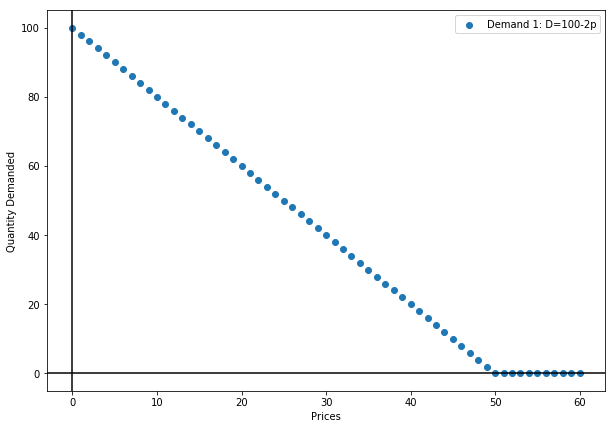

In [4]:
A = 100 # set parameter A
b = 2 # set parameter b
prices = np.array(range(0, 61)) # generate a vector of prices from 0 to 60 (61 is is the length of the vector) 
demands1 = _Demand_(prices, A,b)
plt.figure(figsize=(10,7)) # specify figure characteristics, here just the figure size.
plt.scatter(prices, demands1) # plot demand and prices
plt.legend(['Demand 1: D=100-2p']) # label data series in legend
plt.xlabel('Prices') # label axis
plt.ylabel('Quantity Demanded') # label axis
plt.axhline(y=0, color='k') # draw origin x axis
plt.axvline(x=0, color='k') # draw origin y axis

## What happens when we change A or b?

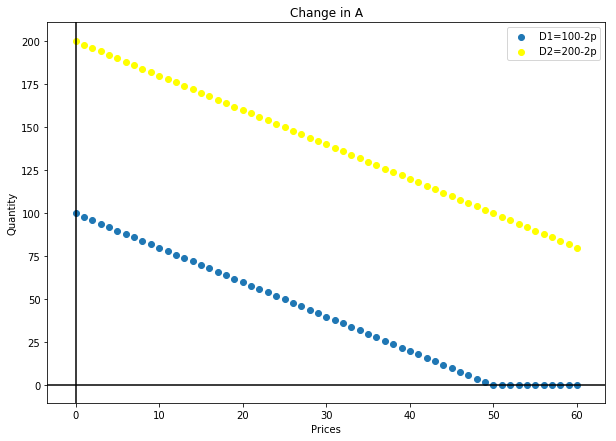

In [5]:
A = 200 # let's change A from 100 to 200
b = 2
demands2 = _Demand_(prices, A,b)
plt.figure(figsize=(10,7))
plt.title('Change in A')
plt.scatter(prices, demands1)
plt.scatter(prices, demands2, c = 'Yellow')
plt.legend(['D1=100-2p', 'D2=200-2p'])
plt.xlabel('Prices')
plt.ylabel('Quantity')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

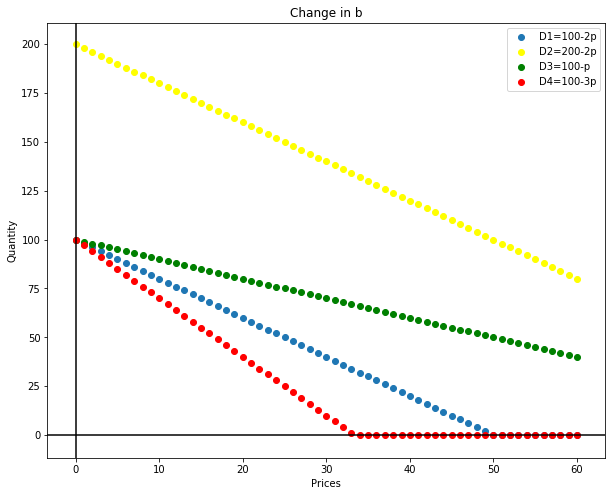

In [7]:
A = 100
b = 1
demands3 = _Demand_(prices, A,b)
b=3
demands4 = _Demand_(prices, A,b)
plt.figure(figsize=(10,8))
plt.title('Change in b')
plt.scatter(prices, demands1)
plt.scatter(prices, demands2, c = 'Yellow')
plt.scatter(prices, demands3, c = 'Green')
plt.scatter(prices, demands4, c = 'Red')
plt.legend(['D1=100-2p', 'D2=200-2p', 'D3=100-p', 'D4=100-3p'])
plt.xlabel('Prices')
plt.ylabel('Quantity')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Next, we plot revenue for All 4 of our demand functions. Note that revenue is just price X demand

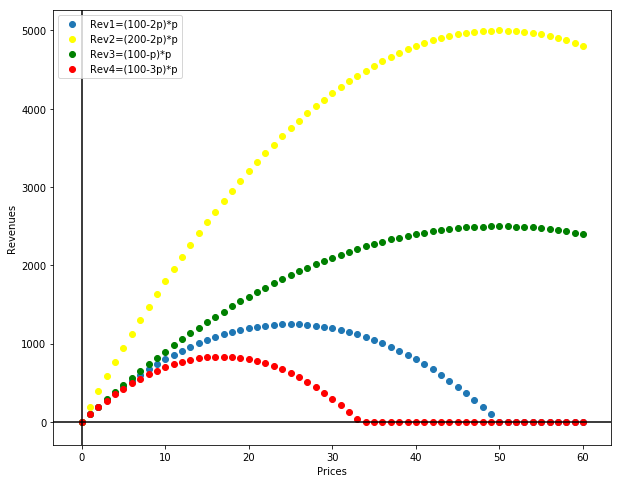

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(prices, demands1*prices)
plt.scatter(prices, demands2*prices, c = 'Yellow')
plt.scatter(prices, demands3*prices, c = 'Green')
plt.scatter(prices, demands4*prices, c = 'Red')
plt.legend(['Rev1=(100-2p)*p', 'Rev2=(200-2p)*p', 'Rev3=(100-p)*p', 'Rev4=(100-3p)*p'])
plt.xlabel('Prices')
plt.ylabel('Revenues')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

Note that with linear demand, all revenue functions are parabolic and concave. This means that there is a uniue global maximum in the revenue. Is this the point we want to price at? No, because we haven't looked at costs yet. There are 2 components to cost, fixed and marginal. Fixed cost is applied regardless of how many units are made/sold. Marginal cost is a per unit cost of production/sale (assuming no waste).
Notice that the fixed costs shift profit down from revenue since the same quantity is subtracted from the revenue. 

In [12]:
def _profit_(demands, prices, c_fixed, c_marginal): # define the profit function
    return demands*(prices-c_marginal)-c_fixed

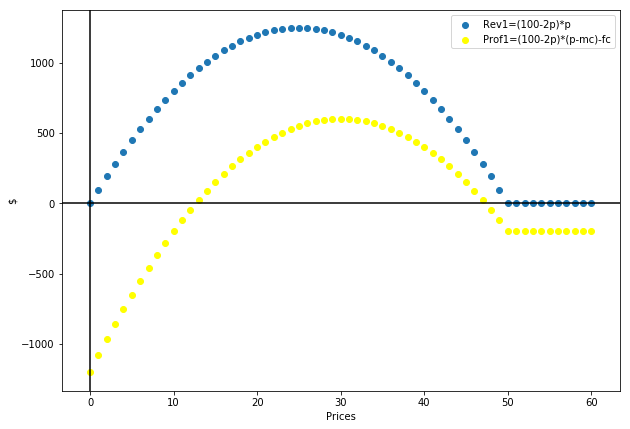

In [14]:
plt.figure(figsize = (10,7))
plt.scatter(prices, demands1*prices)
plt.scatter(prices, _profit_(demands1, prices, 200, 10), c='Yellow')
plt.legend(['Rev1=(100-2p)*p', 'Prof1=(100-2p)*(p-mc)-fc'])
plt.xlabel('Prices')
plt.ylabel('$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Compute a break even price / quantity
If we know the demand function (the amount we sell at a given price), and the costs of production, we can figure out what is the price that gets us to breakeven. Alternatively, given the cost structure, we can compute the quantity that we would need to sell to break even at any given price.

### First, let's assume we know demand and costs and compute the break even price
We know demand is this:
$D=100-2p$

So the profit function is this:
$\Pi=(100-2p)(p-c_m)-c_f$

Let's say the marginal cost, $c_m$, is 10, and fixed costs, $c_f$, is 200. We substitute these numbers into the profit function and get: $\Pi=(100-2p)(p-10)-200$

If we want to solve for breakeven price, what do we do next?

Set $\Pi=0$

$0=(100-2p)(p-10)-200$

$0=-2p^2+120p-1200$


Recall the quadratic formula: for $0=ax^2+bx+c$, we can solve for x using 
$\frac{-b\pm\sqrt{b^2-4ac}}{2a}$

Applied to our problem: $a=-2$, $b=120$, $c=-1200$

What is the solution? (note we only want positive solutions)
$10(3\pm\sqrt{3})$

In [15]:
10*(3+np.sqrt(3)) # compute the first 0

47.320508075688764

In [16]:
10*(3-np.sqrt(3)) # compute the second 0

12.679491924311229

### Next, let's compute the break even quantity for each price level
We know only the cost structure, so our profit function looks like this:
$\Pi=D(p-c_m)-c_f=D(p-10)-200$

Next, we set profit to be 0 and solve for Demand:
$0=D(p-10)-200$

$D=\frac{200}{p-10}$

Obviously, it is impossible to have a positive demand if $p<10$. 

##### What is the break even quantity at price = 12? 14?

##### We plot the break even quantity must be for each level of p>10 below.

C:\Users\yangy\AppData\Local\conda\conda\envs\py27\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


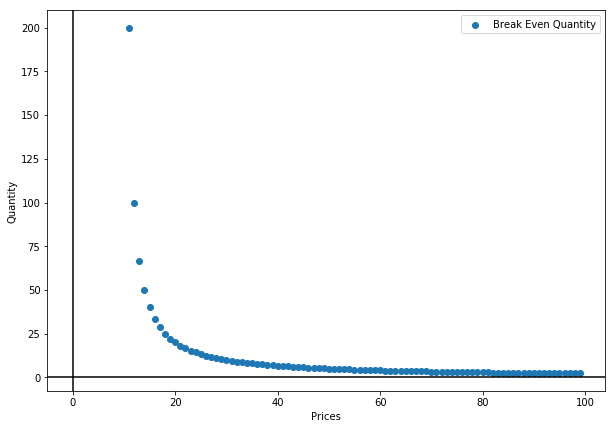

In [18]:
from __future__ import division
P = np.array(range(10, 100))
D = 200/(P-10)
plt.figure(figsize=(10,7))
plt.scatter(P, D)
plt.legend(['Break Even Quantity'])
plt.xlabel('Prices')
plt.ylabel('Quantity')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

### Finally, we can compute the break even price for every level of demand given a cost structure.
We know only the cost structure, so our profit function looks like this:
$\Pi=D(p-c_m)-c_f=D(p-10)-200$

Next, we set profit to be 0 and solve for price:
$0=D(p-10)-200$

$p=\frac{200}{D}+10$

#### What's the break even price if demand is 100? 200?

#### We plot the break even price curve for this cost structure below at each level of demand.

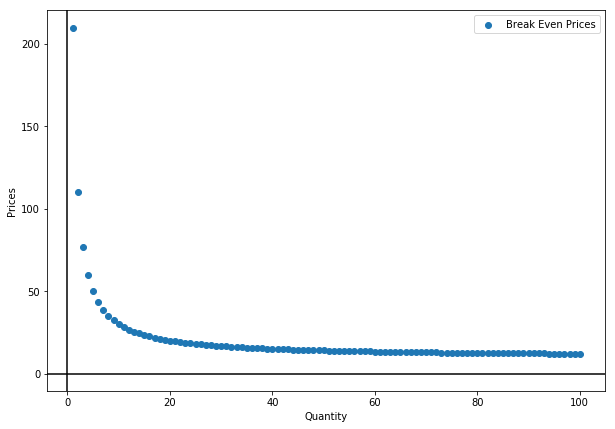

In [19]:
D = np.array(range(1,101))
P = 200/D+10
plt.figure(figsize=(10,7))
plt.scatter(D, P)
plt.legend(['Break Even Prices'])
plt.xlabel('Quantity')
plt.ylabel('Prices')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

# Maximizing profit for a generic demand function
For some marginal cost and fixed cost, we can express profit as follows:
$\Pi=D(p)(p-c_m)-c_f$

where $D(p)$ is some demand that is a function of price.

As long as this profit function is concave (opens down, also second derivative is negative), we can solve for the price that gives us maximum profit by calculating the first order condition (FOC), $\Pi'=0$ (where derivative is with respect to price).

Using the product rule, we get:
$\Pi'=D'(p)(p-c_m)+D(p)$, which we set to equal 0 and solve for p. Note that the profit maximizing price does not depend on fixed costs.

### Example: linear demand. 

Let $D(p)=A-bp$. Then $\Pi=(A-bp)(p-c_m)-c_f$ and $\Pi'=-b(p-c_m)+A-bp=A-2bp+bc_m=0$

Solving for p, we get $p=\frac{A+bc_m}{2b}$

For our previous cost structure, $c_m=10$, $b=2$, $A=100$, we have $p^*=\frac{100+2\times10}{2\times2}=30$

Plug in 30 for p, and we find that the profit, $\Pi^*=600$


In [22]:
def _pstar_linear_(A,b,c_m):
    return (A+b*c_m)/(2*b)

In [23]:
pstar = _pstar_linear_(100,2,10)
profstar = _profit_(_Demand_(pstar,100,2), pstar, 200, 10)
pstar, profstar

(30.0, 600.0)

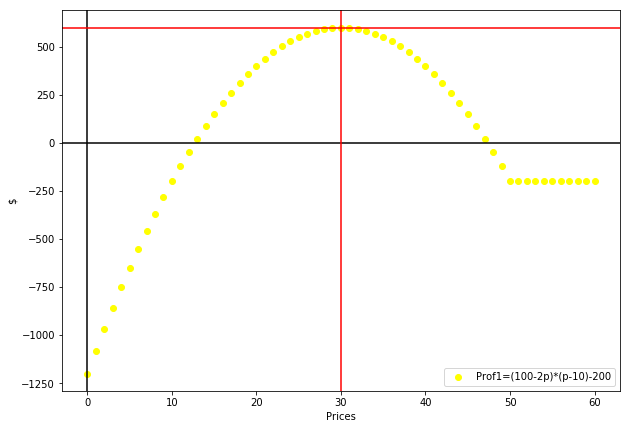

In [24]:
plt.figure(figsize = (10,7))
plt.scatter(prices, _profit_(demands1, prices, 200, 10), c='Yellow')
plt.legend(['Prof1=(100-2p)*(p-10)-200'])
plt.xlabel('Prices')
plt.ylabel('$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
pstar = _pstar_linear_(100,2,10)
plt.axvline(x=pstar, color='r')
plt.axhline(y=_profit_(_Demand_(pstar,100,2), pstar, 200, 10), color='r')

# Profit Maximization with data

In 4 equivalent test markets, we have the following sales for prices:

Market 1: 400 units @ \$3

Market 2: 300 units @ \$5

Market 3: 200 units @ \$8

Market 4: 100 units @ \$9

The marginal cost is $2.50, what is the profit maximizing price?

Text(0.5,0,u'Prices')

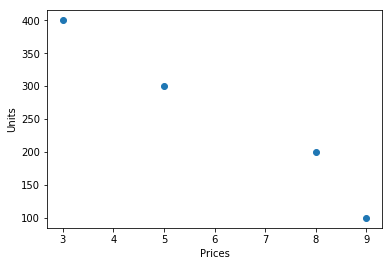

In [25]:
import pandas as pd
sales = [400,300,200,100]
prices = [3, 5, 8, 9]
data = pd.DataFrame(list(zip(prices, sales)), columns = ['Prices', 'Units'])
data['constant'] = 1
plt.scatter(prices, sales)
plt.ylabel('Units')
plt.xlabel('Prices')

In [26]:
import statsmodels.formula.api as smf
results = smf.ols(formula = 'Units~Prices', data = data).fit()
results.summary()

C:\Users\yangy\AppData\Local\conda\conda\envs\py27\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Units   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     63.00
Date:                Mon, 26 Feb 2018   Prob (F-statistic):             0.0155
Time:                        16:00:29   Log-Likelihood:                -17.580
No. Observations:                   4   AIC:                             39.16
Df Residuals:                       2   BIC:                             37.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    538.4615     38.899     13.843      0.005     371.094     705.829
Prices       -46.1538      5.815     -7.937      0.016     -71.173     -21.135
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.885
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.363
Skew:                           0.543   Prob(JB):                        0.834
Kurtosis:                       2.000   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
data['Units_predicted'] = np.dot(data[['Prices', 'constant']],results.params[::-1])
data

,Prices,Units,constant,Units_predicted
0,3,400,1,400.000000
1,5,300,1,307.692308
2,8,200,1,169.230769
3,9,100,1,123.076923


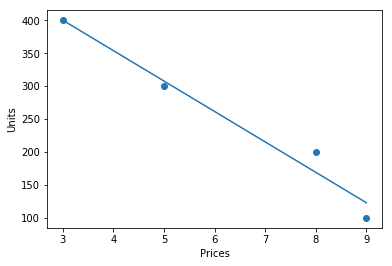

In [28]:
plt.scatter(data.Prices, data.Units)
plt.ylabel('Units')
plt.xlabel('Prices')
plt.plot(data.Prices, data.Units_predicted)

In [29]:
results.params

Intercept    538.461538
Prices       -46.153846
dtype: float64

In [30]:
A = results.params['Intercept']
b = -results.params['Prices']
c_m = 2.5
c_f = 200
pstar = _pstar_linear_(A,b,c_m)
profstar = _profit_(_Demand_(pstar, A,b), pstar, c_f, c_m)
pstar, profstar

(7.083333333333333, 769.55128205128176)

In [31]:
prices = np.array([v/2 for v in range(0,25)])
demands_est = _Demand_(prices, A,b)
prof_est = _profit_(demands_est, prices, c_f, c_m)

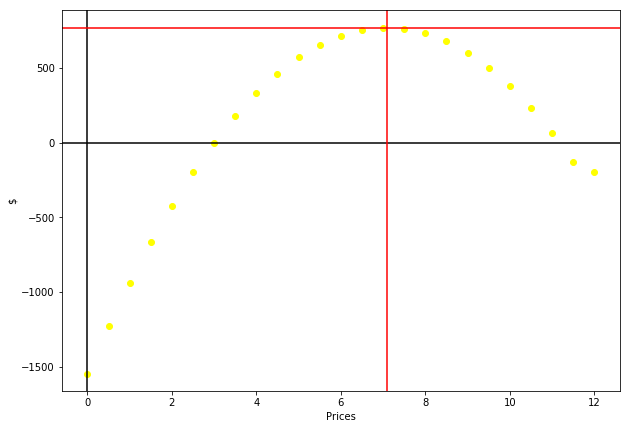

In [32]:
plt.figure(figsize = (10,7))
# plt.scatter(data.Prices, data.Units)
plt.scatter(prices, prof_est, c='Yellow')
plt.xlabel('Prices')
plt.ylabel('$')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.axvline(x=pstar, color='r')
plt.axhline(y=_profit_(_Demand_(pstar,A,b), pstar, c_f, c_m), color='r')